# Sweet Lift. Predicción de pedidos de taxis

## Contenido <a id='back'></a>

* [1. Descripción del proyecto](#intro) 
* [2. Exploración y preprocesamiento de los datos](#data_review)
* [3. EDA](#eda)
* [4. Formación de modelos](#model)
* [5. Prueba](#test)
* [Conclusiones](#end)

## 1. Descripción del proyecto <a id='intro'></a>

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

### Objetivo

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

### Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

[Regresar a contenido](#back)

## 2. Exploración y preprocesamiento de los datos <a id='data_review'></a>

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

### Preparación

In [1]:
# Se importa las librerías que utilizaremos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [2]:
# Cargamos los datos

df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])


In [3]:
# Se hace una revisión general de los datos

df.head()

In [4]:
# Se hace una revisión global de los datos

df.info()

In [5]:
# Se verifica si hay datos ausentes

df.isna().sum()

In [6]:
df.sort_index(inplace=True)

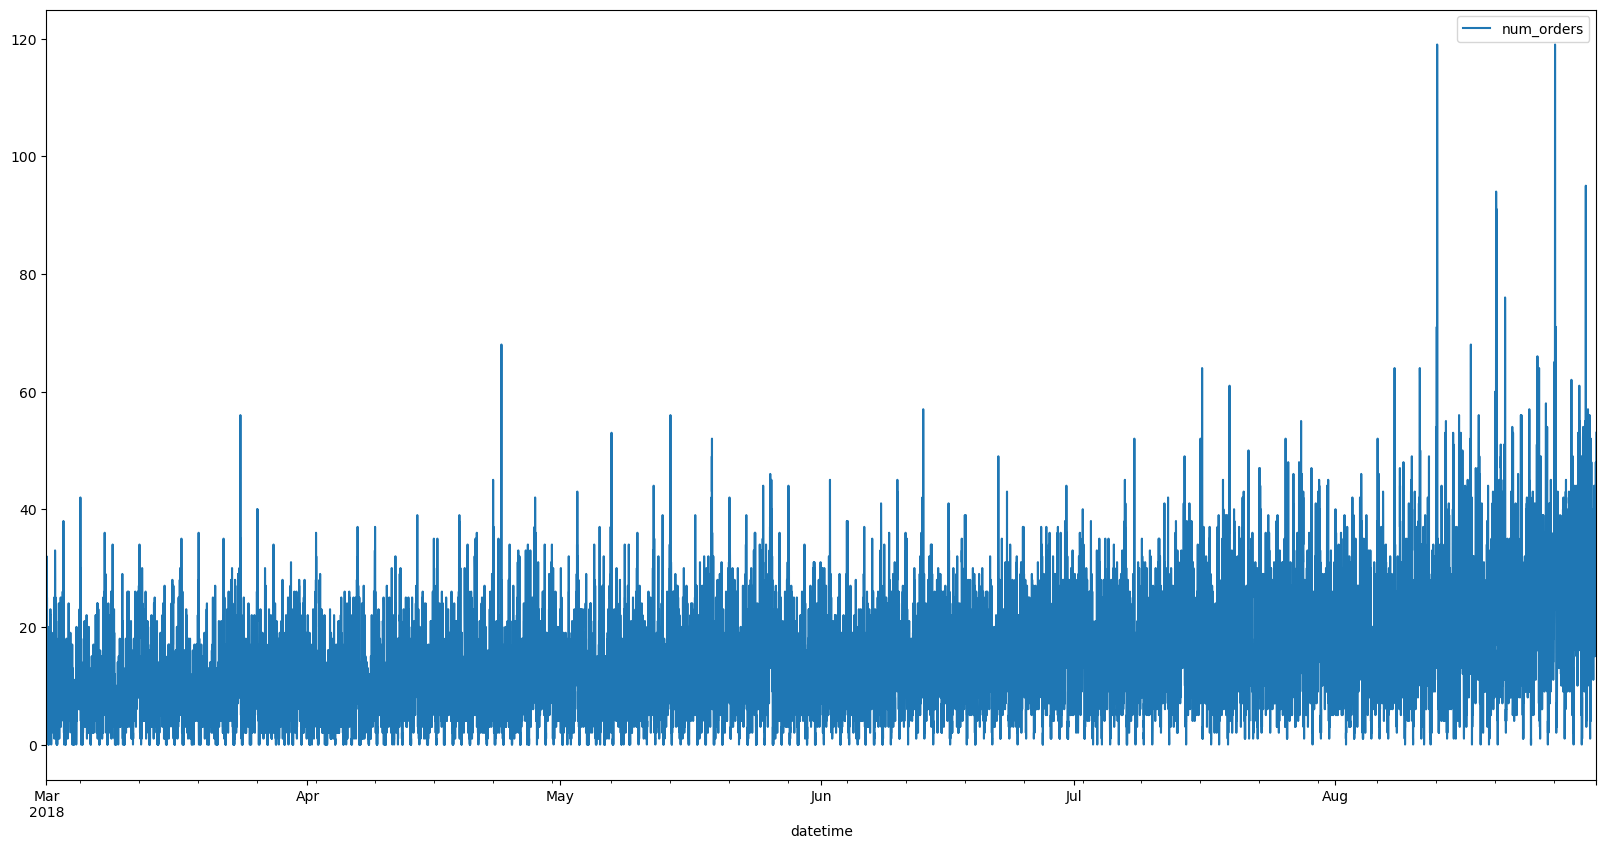

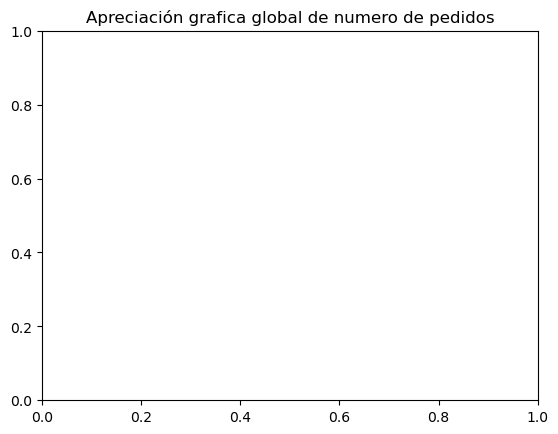

In [7]:
# Se realiza un gráfico para la observación gráfica de los datos

df.plot(figsize=(20,10))
plt.show()
plt.title('Apreciación grafica global de numero de pedidos')


In [8]:
# Se remuestrea por hora

df_hr=df.resample('1H')



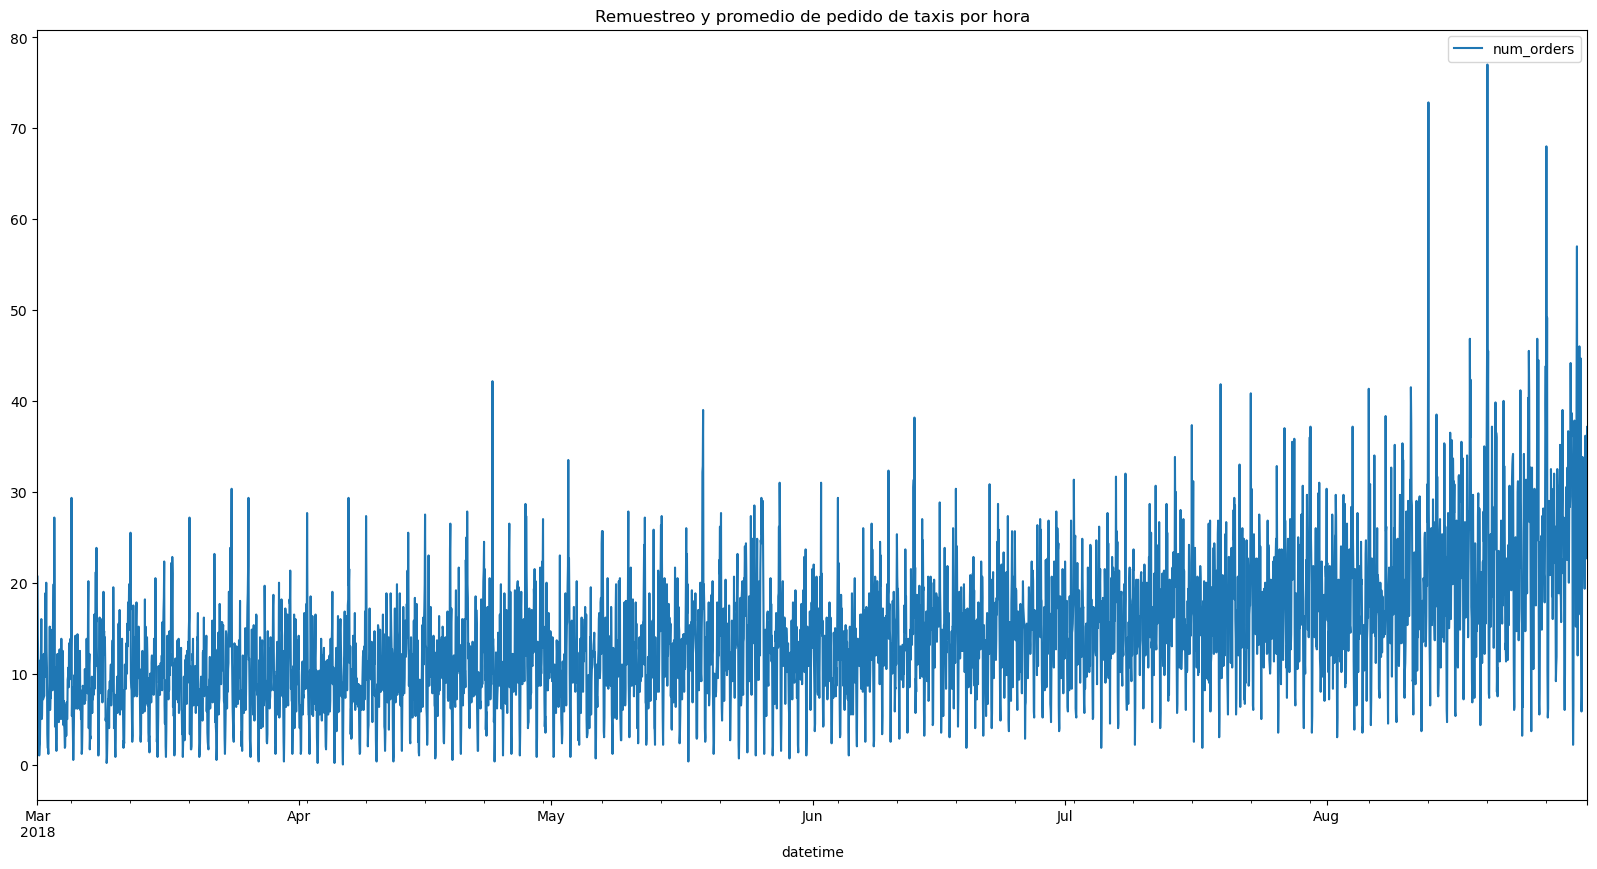

In [9]:
df_hr.mean().plot(figsize=(20,10))
plt.show
plt.title('Remuestreo y promedio de pedido de taxis por hora')

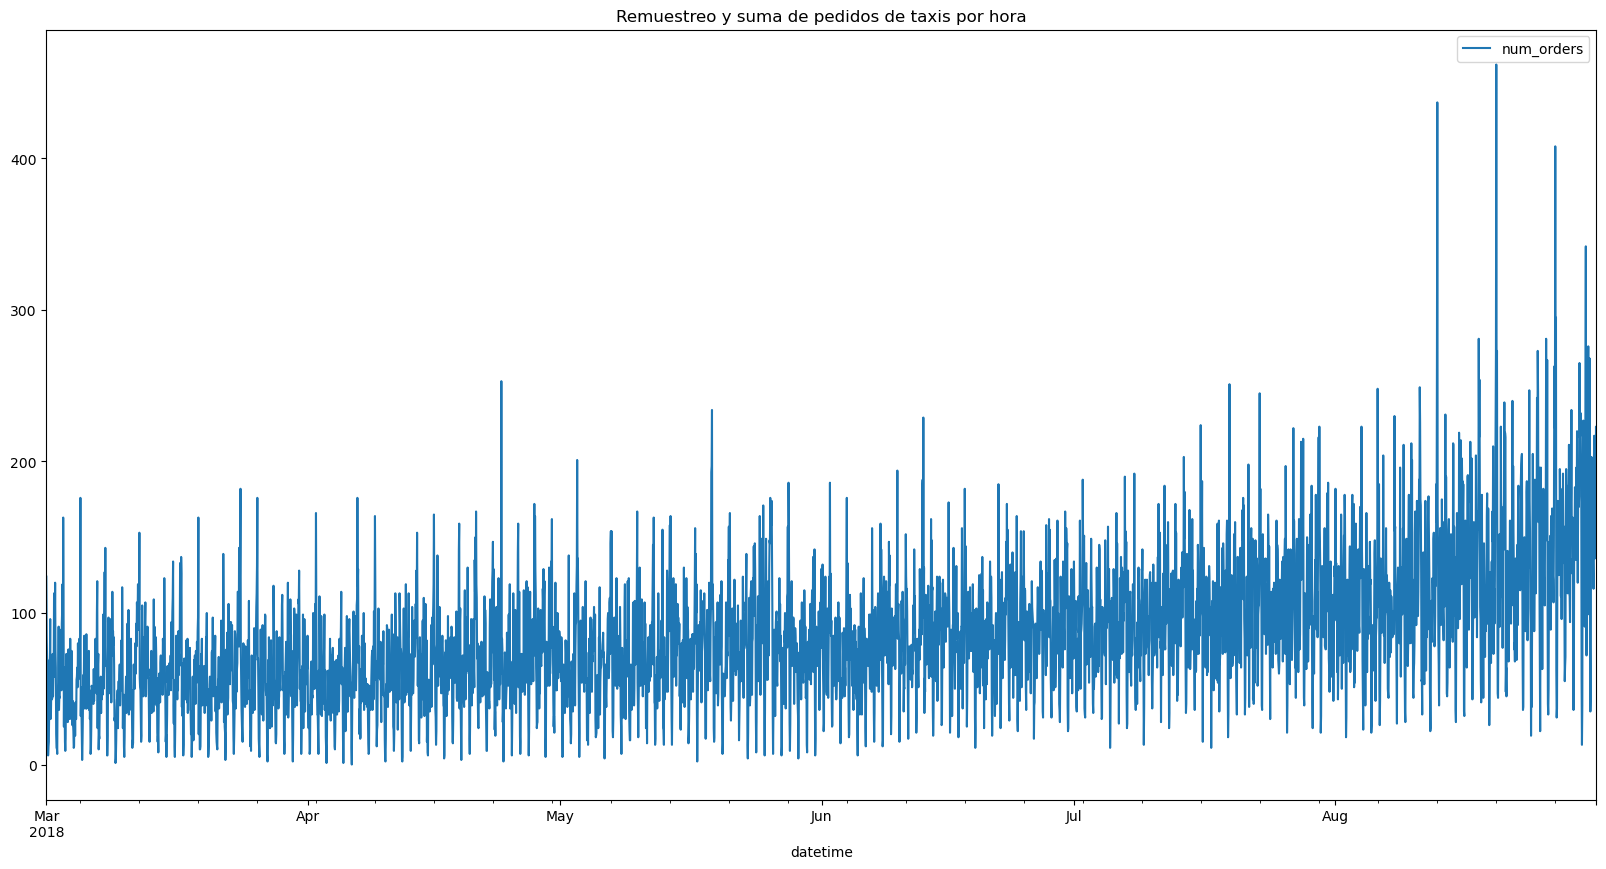

In [10]:
df_hr.sum().plot(figsize=(20,10))
plt.show
plt.title('Remuestreo y suma de pedidos de taxis por hora')

Incicialmente comenzamos descargando las librerías y cargamos los datos, estableciendo como índice las fechas y que este esté en formato de datetime desde este moento.

se revisaron a agrandes rasgo los datos y se realizó un remuestreo por hora, también se realizó una representación gráfica de los datos global original, en donde podemos observar que los datos tienden a ir en ascenso conforme pasa el tiempo, lo que nos indica que tiene una tendencia con pendiente positiva, sin embargo, no se puede observar esto nítidamente. Pero cuando se realiza el remuestreo de los datos por hora,realizando una apreciaciónd e stos datos de promeio y suma por hora, en donde podemos observar en ambos gráficos la misma tendencia con un amayor claridad, debido a que se agruparon los datos por hora y se puede observar mejor esta pendiente positiva y el aumento de los pedidos de taxis en función del tiempo.

[Regresar a contenido](#back)

## 3. EDA <a id='eda'></a>

In [11]:
# Se pbserban en general los datos del data frame remuestrado por hora

df_hr.sum().head()

In [12]:
# Se revisan globalmente los datos 

df_hr.sum().info()

In [13]:
df_hr.mean().describe()

In [14]:
# Se revisan la presencia de los datos ausentes

df_hr.mean().isna().sum()

Podemos observar que los datos no contienen elementos ausentes.

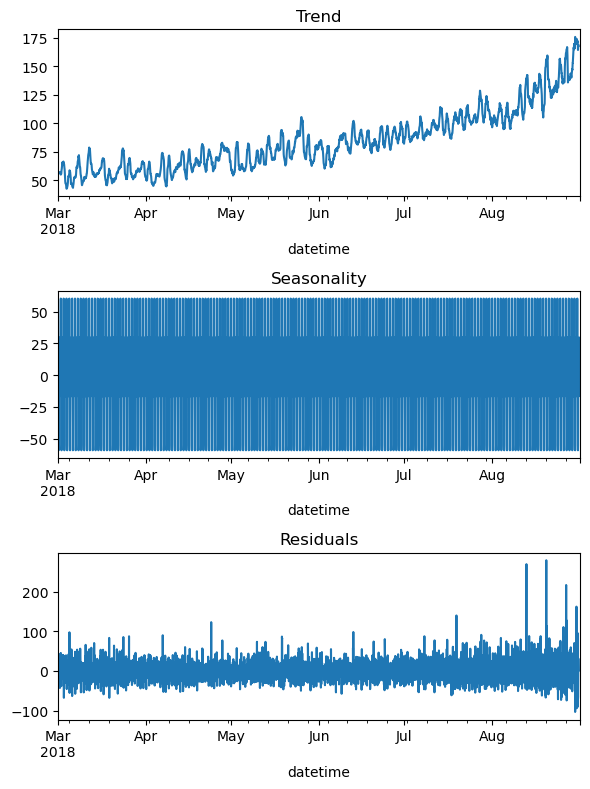

In [15]:
df_hr_sum= df_hr.sum()


decomposed_sum = seasonal_decompose(df_hr_sum)

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 


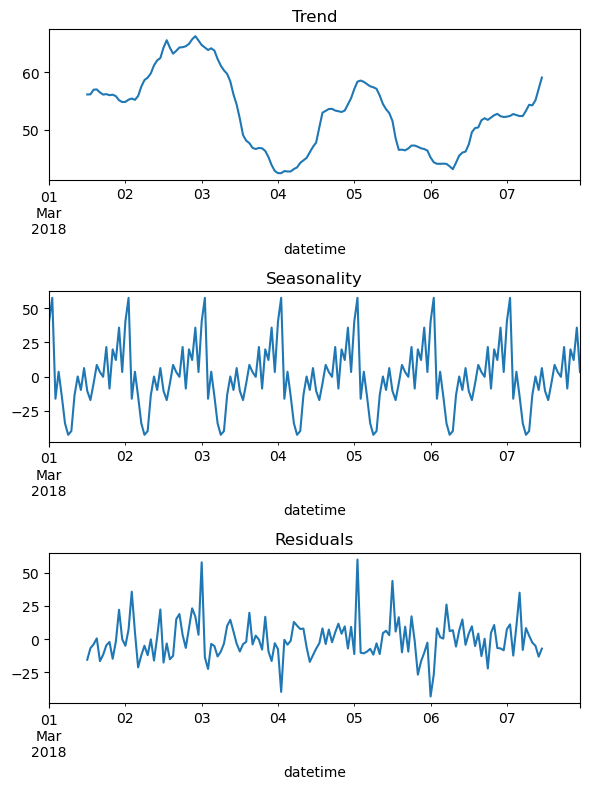

In [16]:
# Análisis por hora en siete días 

df_red_hr=df['2018-03-01':'2018-03-07'].resample('1H').sum()

decomposed_sum = seasonal_decompose(df_red_hr)

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 

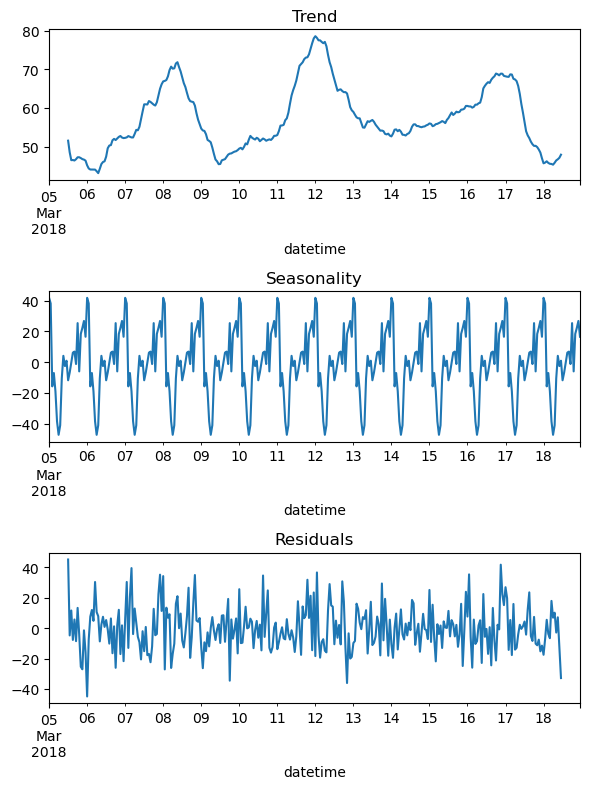

In [17]:
# Análisis por hora en dos semanas iniciando en lunes

decomposed_sum = seasonal_decompose(df['2018-03-05':'2018-03-18'].resample('1H').sum())

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 

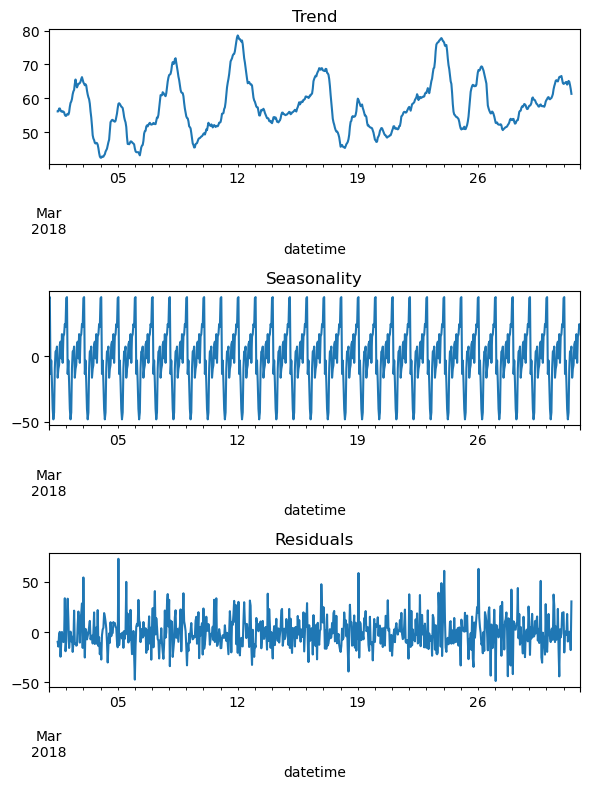

In [18]:
# Análisis por hora en un mes

decomposed_sum = seasonal_decompose(df['2018-03'].resample('1H').sum())

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 

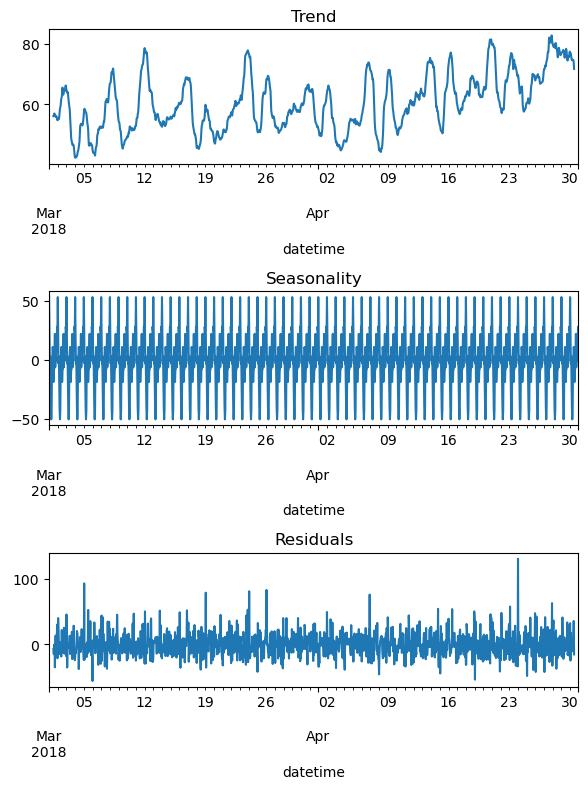

In [19]:
# Análisis por hora en dos semanas iniciando en lunes

decomposed_sum = seasonal_decompose(df['2018-03':'2018-04'].resample('1H').sum())

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 

Se probaron con los datos remuestrados por hora se analizó mediante season_decompose(), en diferentes periodos de tiempo para poder observar tanto la tendencia como la estacionalidad, logrando ver patrones de comportamiento diarios, en donde se aprecia que se piden más servicios en las noches, comportamiento que podemos observar es escalas de días, semanas y meses en el comportamiento global.

In [20]:
df_hr_sum

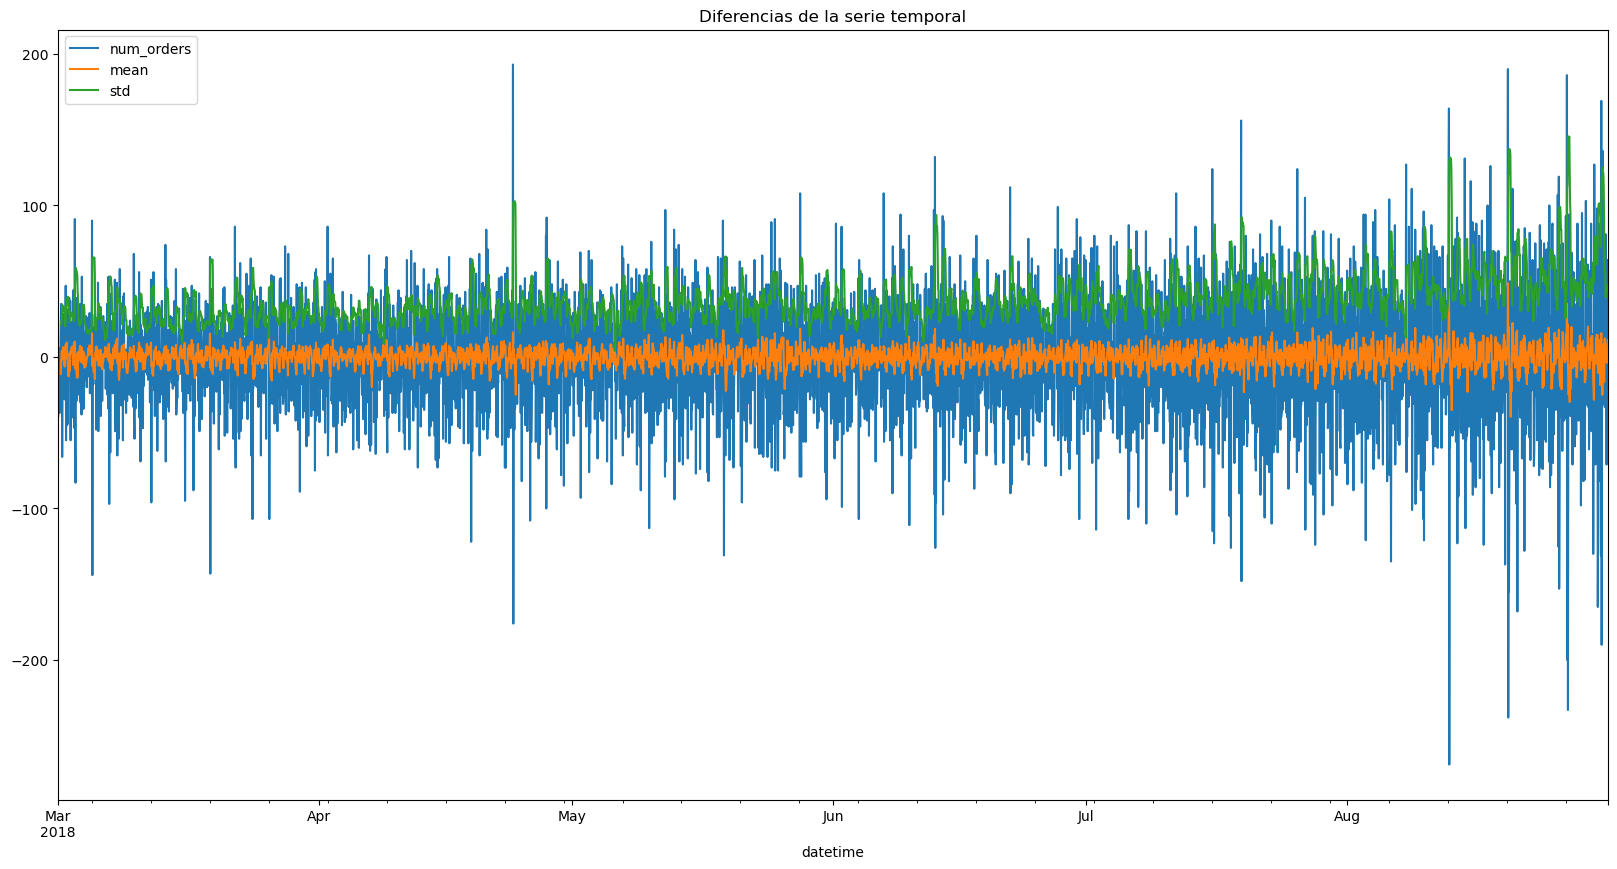

In [21]:
# Diferencias de las series temporales

df_hr_sum_analysis = df_hr.sum()
df_hr_sum_analysis -= df_hr_sum_analysis.shift()
df_hr_sum_analysis['mean']= df_hr_sum_analysis['num_orders'].rolling(8).mean()
df_hr_sum_analysis['std']= df_hr_sum_analysis['num_orders'].rolling(8).std()
df_hr_sum_analysis.plot(figsize=(20,10))
plt.show
plt.title('Diferencias de la serie temporal')

Podemos observar que los datos remuestrados por hora en diferentes niveles o periodos de tiempo, no se pudo observar una estacionalidad en un día, por lo que se comenzó el análisis en 3 días, en donde podemos observar que está bien definida la estacionalidad,  sin embargo, no se puede definir una tendencia, lo cual tambien se puede observar el mismo comportamiento en un perioso de tiempo emnsual, cuando incrmenetamos el periodo de tiempo para revisar el mismo remuestreo, a tres meses y todo el tiempo que tenemos en lo sdatos, podemos observar que se puede empezar a observar una tendencia con pendiente positiva en los datos, manteniendo constante su estacionalidad con los mismos patrones reitiendose de manera cíclica en cada día, en donde se puede apreciar que por las noches son cuando se piden un amayor cantidad de taxis.

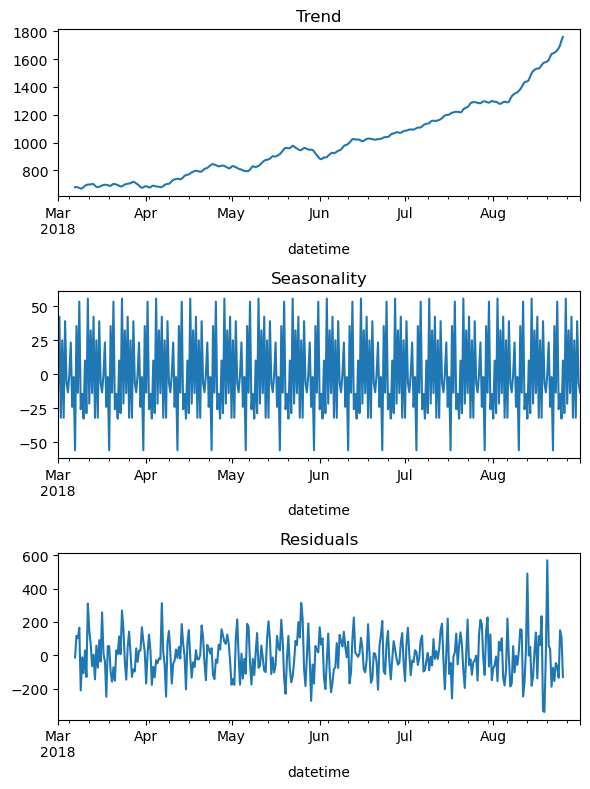

In [22]:
# Análisis con remuestreo de 12 horas

decomposed_sum = seasonal_decompose(df.resample('12H').sum())

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 

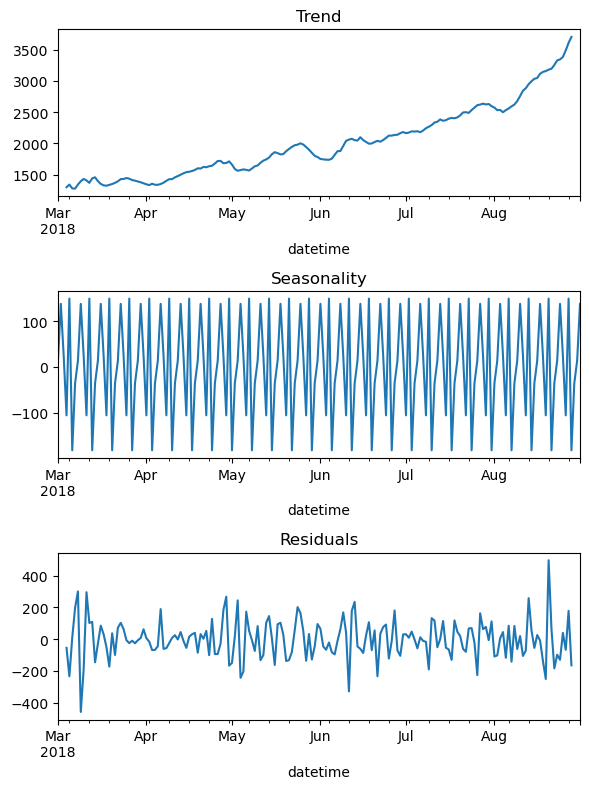

In [23]:
# Análisis de remuestreo por día

decomposed_sum = seasonal_decompose(df.resample('1D').sum())

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 


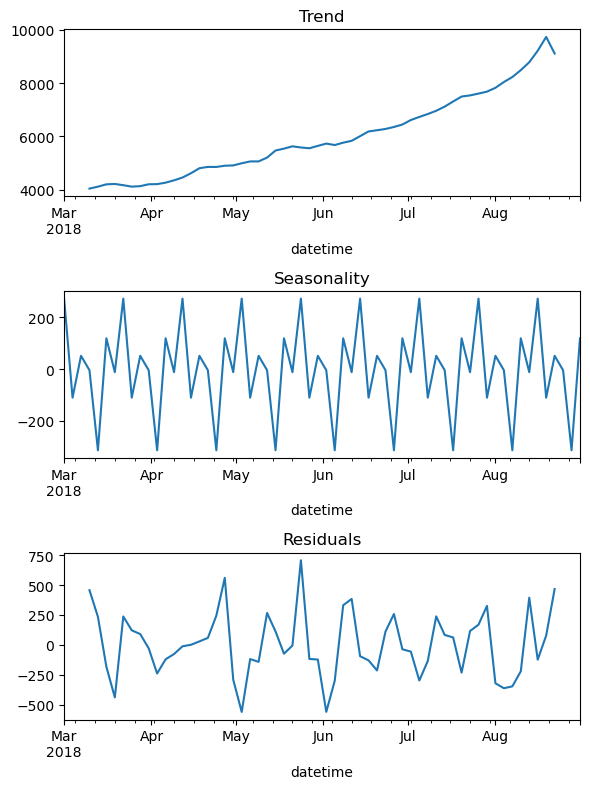

In [24]:
# Analisis de remuestreo de 3 días

decomposed_sum = seasonal_decompose(df.resample('3D').sum())

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed_sum.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_sum.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed_sum.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 

En este caso también se analizaron los datos a diferentes remuestreos, en donde en un aapreciación global, se puede observar tambien diferentes periodos estacionarios y también se puede observar una tendencia ascendente basandonos en su pendiente. 

[Regresar a contenido](#back)

## 4. Formación de modelos <a id='model'></a>

### Entrenamiento de modelos

In [25]:
#Se crean las caracteísticas 

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = (data['num_orders'].shift().rolling(rolling_mean_size).mean())

make_features(df_hr_sum, 6, 6)


In [26]:
# Se establecen la muestra de prubea del 10% del conjunto de datos iniciales

train, test = train_test_split(df_hr_sum, shuffle=False, test_size=0.1)
train = train.dropna()

In [27]:
train

In [28]:
test

In [29]:
# Se determinan las varibles de features y target para cada uno de los conjuntos de datos

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']


In [30]:
# Se entrena el modelo de Regresión Linear

model_linear = LinearRegression()
model_linear.fit(features_train, target_train)

pred_train_linear = model_linear.predict(features_train)


eam_train_linear= mean_absolute_error(target_train, pred_train_linear)


mse_train_linear = mean_squared_error(target_train, pred_train_linear)
rmse_train_linear = mse_train_linear**0.5

r2_train_linear =r2_score(target_train, pred_train_linear)

print('Para el conjunto de entrenamiento RL RMSE= ', rmse_train_linear, ', R2= ', r2_train_linear, ', EAM= ', eam_train_linear )



In [31]:
# Se entrena el modelo de árbol de decisiones

best_mse_tree_train =10000
best_depth_tree = 0
best_rmse_tree_train = 0
best_r2_tree_train = 0
best_eam_tree_train = 0

for depth_tree in range (1,20):
    model_tree_train= DecisionTreeRegressor(max_depth=depth_tree, random_state=12345)
    model_tree_train.fit(features_train, target_train)

    predictions_tree_train = model_tree_train.predict(features_train)
    
    mse_tree_train = mean_squared_error(target_train, predictions_tree_train)
    rmse_tree_train = mse_tree_train**0.5

    r2_tree_train =r2_score(target_train, predictions_tree_train)

    eam_tree_train= mean_absolute_error(target_train, predictions_tree_train)

    if mse_tree_train < best_mse_tree_train :
            best_depth_tree = depth_tree
            best_rmse_tree_train = rmse_tree_train
            best_r2_tree_train = r2_tree_train
            best_eam_tree_train = eam_tree_train

    print('Depth', depth_tree, ', RMSE= ', rmse_tree_train, ', R2= ', r2_tree_train, ', EAM= ', eam_tree_train )

print('Para el conjunto de entrenamiento AD Depth', depth_tree, ', RMSE= ', rmse_tree_train, ', R2= ', r2_tree_train, ', EAM= ', eam_tree_train )

In [32]:
# Se entrena el modelo de bosque aleatorio

best_mse_forest_train =10000
best_depth_forest = 0
best_estimator_forest=0
best_rmse_forest_train = 0
best_r2_forest_train = 0
best_eam_forest_train = 0


for depth_forest in range (1,10):
    for estimator_forest in range (1,20):    
        model_forest_train= RandomForestRegressor(n_estimators=estimator_forest, max_depth=depth_forest, random_state=12345)
        model_forest_train.fit(features_train, target_train)

        predictions_forest_train = model_forest_train.predict(features_train)

        mse_forest_train = mean_squared_error(target_train, predictions_forest_train)
        rmse_forest_train = mse_forest_train**0.5

        r2_forest_train=r2_score(target_train, predictions_forest_train)

        eam_forest_train= mean_absolute_error(target_train, predictions_forest_train)

        if mse_tree_train < best_mse_tree_train :
            best_depth_tree = depth_tree
            best_estimator_forest = estimator_forest
            best_rmse_tree_train = rmse_tree_train
            best_r2_tree_train = r2_tree_train
            best_eam_tree_train = eam_tree_train

print('Para el conjunto de entrenamiento BA Depth', depth_forest, ', n_estimator', estimator_forest ,', RMSE= ', rmse_forest_train, ', R2= ', r2_forest_train, ', EAM= ', eam_forest_train )



Podemos observar que el mejor modelo para realizar las predicciones es el bosque aleatorio, donde podemos observar que el RMSE es de 13.4 y las demás métricas con mejores resultados que las otros dos modelos. en el caso del árbol de decisiones podemos observar que se llega a un punto con valores de Depth de 29 en donde el RMSE es 2, esto puede ser debido a que esté sobreajustado, por lo que no se considerará.

[Regresar a contenido](#back)

## 5. Prueba <a id='test'></a>

In [33]:
# Probaremos los datos de prueba con el mejor modelo y sus mejores hiperpaámetros

best_model = RandomForestRegressor(n_estimators=19, max_depth=9, random_state=12345)
best_model.fit(features_train, target_train)

predictions_forest_test = best_model.predict(features_test)

mse_forest_test = mean_squared_error(target_test, predictions_forest_test)
rmse_forest_test = mse_forest_test**0.5

r2_forest_test=r2_score(target_test, predictions_forest_test)

eam_forest_train= mean_absolute_error(target_test, predictions_forest_test)

print('Para el conjunto de prueba BA RMSE= ', rmse_forest_test, ', R2= ', r2_forest_test, ', EAM= ', eam_forest_train )

In [34]:
# Se entrena el modelo de Regresión Linear

model_linear = LinearRegression()
model_linear.fit(features_train, target_train)

pred_test_linear = model_linear.predict(features_test)

eam_test_linear= mean_absolute_error(target_test, pred_test_linear)


mse_test_linear = mean_squared_error(target_test, pred_test_linear)
rmse_test_linear = mse_test_linear**0.5

r2_test_linear =r2_score(target_test, pred_test_linear)

print('Para el conjunto de prueba RL RMSE= ', rmse_test_linear, ', R2= ', r2_test_linear, ', EAM= ', eam_test_linear )


Revisando los modelos con los datos de prueba, podemos observar que no se obtienen los resultados parecidos a los de entrenamiento, lo cual puede ser debido a los sobreajustes, sin embargo, el resultado es satisfactorio en el caso del modelo de bosque aleatorio, debido a que se obtiene un RMSE menor a 48.

[Regresar a contenido](#back)

## Conclusión <a id='end'></a>

Inicialmente, en este proyecto se comenzó por adecuar los tipos de datos de fechas correctamente y convertir las fechas en índice, posteriormente se realizó el remuestro por hora de los datos, por lo que se observó una disminución de los datos, ya que se adecuaron por hora y se graficó, se revisó la presencia de datos ausentes los cuales no se presentaron.

Posteriormente se realizó el análisis de los datos, en donde pudimos apreciar en diferentes periodo sde tiempo para apreciar (7 días, dos semanas, un mes y global) en donde se pudo apreciar la estacionalidad, al poder apreciar los patrones que se repiten cada día, y se observa que hay mayor solicitud de servicios de taxi en las noches, al rededor de la media noche, que en el día. sin embargo, en periodos cortos como los tres días no se podía apreciar adecuadamente la tendencia, sin embargo a partir del mes se puede observar la tendencia de ir incrementando el servicio con respecto al tiempo, teniendo una pendiente positiva de incremento.

Se hizo una prueba realizando remuestreos por cada 12 horas y por día y se observa de la misma manera una estacionalidad.

Se entrenaron los modelos y en el momento del entrenamiento los mejors resultados se obtuvieron con el árbol de desiciones y la regresión lineal, se descartó el de árbol de decisiones porque se llegóa a valores  de RMSE de 2, lo quenos indica que el modelo se sobre ajustó.

Al momento de revisar los modelos de bosque y regresión lineal con los datos de prueba, se pudo observar que el modelo de bosque obtuvo mejores resultados, con un RMSE menor a 48, se revisó también con el modelo de regresión lineal el cual da un resultado de RMSE mayor a 48, no por mucho pero no cumple con lo solicitado.

por lo tanto el mejor modelo con el que se obtiene buenos resultados y un RMSE menor a 48, es el de bosque aleatorio con lo shiperpaámetros n_estimators=19 y max_depth=9, logrando cumplir con le objetivo de dicho proyecto.

[Regresar a contenido](#back)